# PHYS20762 - Project - Project 2: Numerical Integration of Differential Equations of a Damped Harmonic Oscillator


Ronak Gorasia<br>
University of Manchester  
March 2025

We first initialise our Python interpreter and upload the constants given for this project

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import cmath
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## Generating the models using the 4 numerical methods

Our general model for a spring mass system is : 

<center>$m\frac{d^2x}{dt^2} + b\frac{dx}{dt} + kx = f(t)$
</p>
    
, where $x$ is the position of the mass from its rest position, $m$ is the mass, $b$ is the damping constant and $k$ is the spring constant of the system. We are given the spring constant and mass.

To calculate the solutions to these equations 4 numerical methods will be used : the Euler method, the improved Euler method, the Verlet method and the Euler-Cromer method. For this model, $x$ = $0m$, $\frac{dx}{dt}$ = $-1ms^{-1}$ at $t = 0$. We can vary the damping constant from our initial parameters to show the difference between the four models. In all 4 models, there will be a small time step $h$ that allows us to calculate subsequent values in the model. All of the models will initially have the same initial conditions. To begin, $f(t) = 0$.

In [2]:
# Defining our initial parameters

k = 0.61 # spring constant
m = 3.82 # mass
b = 0.1 # damping factor

#Defining the initial step size
h_initial = 0.1

#Defining limit of the model
t_max = 200

x = 0
v = -1

### The Euler Method
To fit the mass-spring system model using the Euler Method, we assume a small time step $h$. This gives us 2 sets of equations :

$x_{i+1}=x_{i}+hv_i$ 

$v_{i+1}=v_{i}+ha_i$ 

where : $a_i = -\frac{k}{m}x_i -\frac{b}{m}v_i$.

The index i labels the steps taken in the process from some pre specified times of $t = 0$ to $t = T$.

In [3]:
#Euler Method Function
def Euler_Method(x,v,h):
    """
    Implements the Euler Method described above by taking in the initial conditions
    """   
    #Position and Velocity Arrays
    n = int(t_max/h)
    v_vals = np.zeros(n)
    x_vals = np.zeros(n)
    
    for i in range(n):
        if i==0: #Implementing initial conditions
            x_vals[i] = x
            v_vals[i] = v
        else: # Iterating Euler method
            v_vals[i] = v_vals[i-1] + h*(-(b/m)*v_vals[i-1] -(k/m)*x_vals[i-1])
            x_vals[i] = x_vals[i-1] + h*v_vals[i-1]
    return(np.array([x_vals,v_vals]))    

### The Improved Euler Method
Similar to the Euler Method previously we use a small time step $h$. However, we have additional terms in our iterative equation for position that also include the effects of acceleration :

$x_{i+1}=x_{i}+hv_i + \frac{h^2}{2}a_i$

$v_{i+1}=v_{i}+ha_i$ 

where : $a_i = -\frac{k}{m}x_i -\frac{b}{m}v_i$.

In [4]:
def Improved_Euler_Method(x,v,h):
    """
    Implements the Improved Euler Method as described above by taking in the initial conditions
    """
    #Position and Velocity Arrays
    n = int(t_max/h)
    v_vals = np.zeros(n)
    x_vals = np.zeros(n)
    
    for i in range(n):
        if i==0:                                                           #Implementing initial conditions
            x_vals[i] = x
            v_vals[i] = v
            a = -(k/m)*x_vals[i] -(b/m)*v_vals[i]
        else:                                                              # Iterating Improved Euler method
            v_vals[i] = v_vals[i-1] + h*(-(b/m)*v_vals[i-1] -(k/m)*x_vals[i-1])
            x_vals[i] = x_vals[i-1] + h*v_vals[i-1] + 0.5*(h**2)*(-(b/m)*v_vals[i-1] -(k/m)*x_vals[i-1])    
    return(np.array([x_vals,v_vals]))    

### Verlet's Method
Verlet's method uses centred derivatives to find the velocity of the system:

<center>$\frac{dx}{dt} = lim_{h \rightarrow 0}  \frac{x(t+h)-x(t-h)}{2h}$.
</p>
<div style="text-align:justify">
With this equation, we can obtain 2 Taylor expansions, which can be rearranged to provide the following equations:<div>
</p></div>
<center>$v_i = \frac{x_{i+1}-x_{i-1}}{2h}$<br>
 , $a_i = -\frac{k}{m}x_i - \frac{b}{m}v_i$ <br>and $x_{i+1} = 2x_i - x_{i-1} + h^2a_i$.

In [5]:
def Verlet_Method(x,v,h,b):
    """
    Implements the Verlet algorithm using the description above.
    
    Parameters:
        x (float): Initial position
        v (float): Initial velocity
        h (float): time step
    Returns:
        x_vals (numpy array): Position values
    """   
    # Time array
    t_vals = np.arange(0, t_max, h)
    N = len(t_vals)
    
    # Arrays to store position and velocity values
    x_vals = np.zeros(N)
    v_vals = np.zeros(N)
    
    # First step using Improved Euler method (since Verlet is not self-starting)
    x_vals[0] = x
    x_vals[1] = x + v*h + 0.5*(-k/m*x_vals[0]) * h**2
    v_vals[0] = v
    # Define constants from the equations
    D = 2*m + b*h
    A = 2*(2 * m-k*h**2)/D
    B = (b*h - 2*m)/D
    
    # Verlet iteration
    for i in range(1, N - 1):
        x_vals[i+1] = A*x_vals[i] + B*x_vals[i-1]
        v_vals[i] = (x_vals[i+1]-x_vals[i-1])/(2*h)
    return np.array([x_vals,v_vals])

### The Euler-Cromer Method
Similar to the Euler Method, the Euler-Cromer method is slightly altered so that energy is conserved.

In [6]:
def EulerCromer_Method(x,v,h):
    '''
    Implements the Euler-Cromer method as described above.
    
    Parameters:
        x (float): Initial position
        v (float): Initial velocity
        h (float): time step
    Returns:
        x_vals (numpy array): Position values
    '''    
    # defining step numbers
    n = int(t_max/h)
    # creating arrays to store position and velocity values
    v_vals = np.zeros(n)
    x_vals = np.zeros(n)
    #Euler-Cromer iteration
    for i in range(n):
        if i==0:
            v_vals[i] = v
            x_vals[i] = x
        else:
            v_vals[i] = v_vals[i-1] + h*(-(b/m)*v_vals[i-1] -(k/m)*x_vals[i-1])
            x_vals[i] = x_vals[i-1] + h*v_vals[i]
            
    return np.array([x_vals,v_vals])

In order to determine which of the models to use in the further study, we must examine each of them against the analytical model as defined by the exact solution:
</p><center>$x = e^\frac{-\gamma t}{2}(Ae^{i\omega t} + Be^{-i\omega t}) $</center> 
</p>A and B are constants that can be found using the initial conditions. $\gamma = \frac{b}{m}$ is the damping ratio and $\omega^2 = \omega_0^2 - \frac{\gamma^2}{4}$ is the frequency and $\omega_0^2=\sqrt{\frac{k}{m}}$ is the natural frequency of the system. 

In [7]:
def Analytical_Method(x_0,v_0,time):
    #Defining Constants
    gamma = b/m
    omega = cmath.sqrt(k/m - (gamma**2)/4)
    A = (((v_0 + (gamma/2)*x_0)/(1j*omega))+x_0) * 0.5
    B = x_0 - A
    
    #Creating arrays for position and velocity using constants defined above. 
    X = np.exp(-gamma*time/2)*(A*np.exp(1j*omega*time)+B*np.exp(-1j*omega*time))
    V = (-gamma/2)*np.exp(-gamma*time/2)*(A*np.exp(1j*omega*time)+B*np.exp(-1j*omega*time)) + (1j*omega)*np.exp(-gamma*time/2)*(A*np.exp(1j*omega*time)-B*np.exp(-1j*omega*time))
    return X,V


The displacement as calculated by the numerical methods and the analytical solution are plotted below.

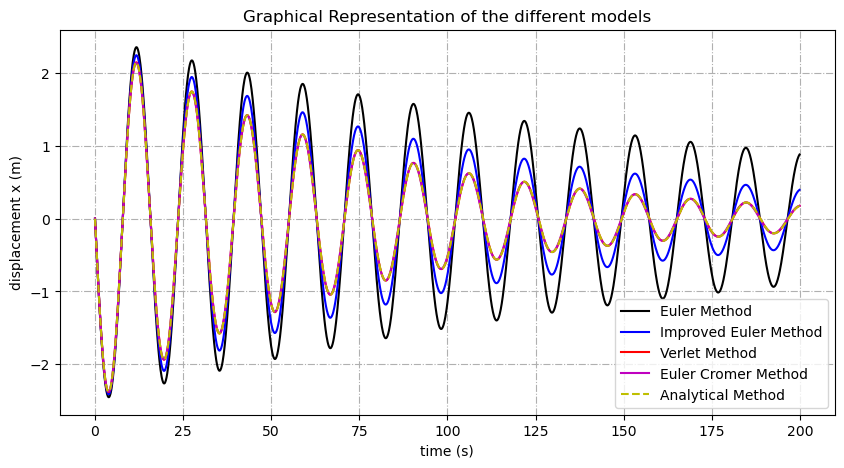

In [8]:
#Creating an array for position of all numerical integrations and analytical solutions
Euler_position = Euler_Method(x,v,h_initial)[0]
Improved_Euler_position = Improved_Euler_Method(x,v,h_initial)[0]
Verlet_position = Verlet_Method(x,v,h_initial,b)[0]
EulerCromer_position = EulerCromer_Method(x,v,h_initial)[0]
Analytical_position = Analytical_Method(x,v,np.arange(0,t_max,h_initial))[0]

positions = [Euler_position,Improved_Euler_position,Verlet_position,EulerCromer_position,np.real(Analytical_position)]

#Plotting the integrations and solution on the same graph
plt.figure(figsize=(10,5))
plt.grid(True,linestyle='-.')
colours = ['k-','b-','r-','m-','y--']
labels = ["Euler Method","Improved Euler Method","Verlet Method","Euler Cromer Method","Analytical Method"]
for i in range(5):
    plt.plot(np.arange(0,t_max,h_initial),positions[i],colours[i],label=labels[i])
plt.xlabel("time (s)")
plt.ylabel("displacement x (m)")
plt.title("Graphical Representation of the different models")
plt.legend()
plt.show()


## Finding the most accurate model
To find the most accurate model the models will be compared to the analytical solution by using the Root Mean Square Error over all time steps in the model.  The equation used to determine this is : $\sqrt{\frac{1}{N}\sum{(x_{num}-x_{exact})^2}}$ where $N$ is the number of points .The use of phase spaces can also show which model represents the analytical solution the best as the plot with the least variation from the analytical method will be the better method. In addition, comparing energy conservation for both the model and the analytical solution will indicate which model is better. This would be found by finding the energy at each point using the equation : $E = \frac{1}{2}mv(t)^2 + \frac{1}{2}kx(t)^2$.

### Energy Conservation

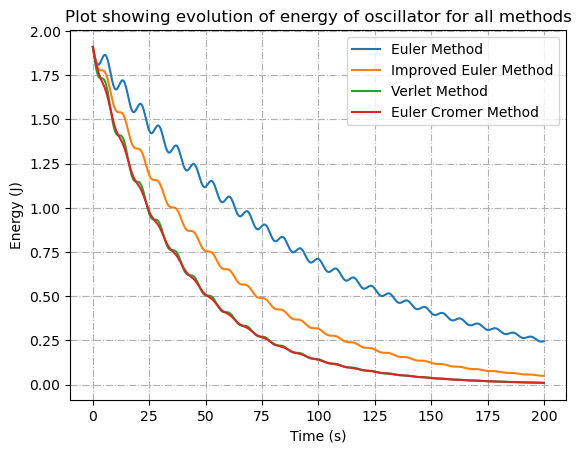

In [9]:
def Energy_output(array,h):
    '''
    This function calculates the energy at each point in time for the mass-spring system for the different numerical methods. 
    '''
    #Creating an array for energy values
    N = int(t_max/h)
    e_vals = np.zeros(N)
    #Assigning velocity and position
    v = array[1]
    x = array[0]
    #Calculating energy at each point in time
    for i in range(N):
        e_vals[i] = 0.5*m*v[i]**2 + 0.5*k*x[i]**2
        
    return np.array(e_vals)

#Creating an array for the energies of all numerical integrations and analytical solutions
E_Euler = Energy_output(Euler_Method(x,v,h_initial),h_initial)
E_Imp_Euler = Energy_output(Improved_Euler_Method(x,v,h_initial),h_initial)
E_Verlet = Energy_output(Verlet_Method(x,v,h_initial,b),h_initial)
E_EulerCromer = Energy_output(EulerCromer_Method(x,v,h_initial),h_initial)

energies = [E_Euler,E_Imp_Euler,E_Verlet,E_EulerCromer]
labels = ["Euler Method","Improved Euler Method","Verlet Method","Euler Cromer Method"]

#Plotting the results
plt.grid(True,linestyle='-.')
for i in range(4):
    plt.plot(np.arange(0,t_max,h_initial),energies[i],label=labels[i])
plt.legend()
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.title("Plot showing evolution of energy of oscillator for all methods")
plt.show()

### Phase Spaces

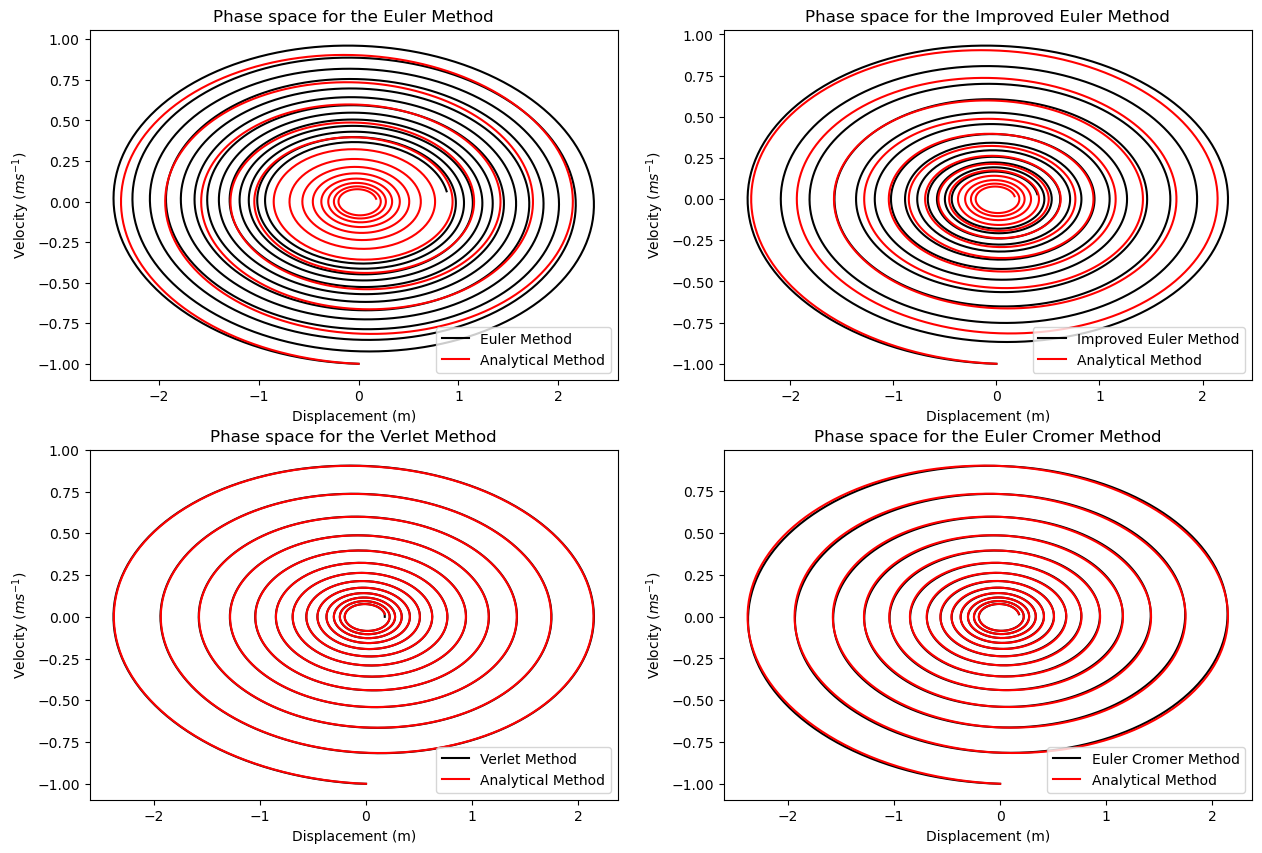

In [10]:
#Creating an array for velocity of all numerical integrations and analytical solutions

Euler_vel = Euler_Method(x,v,h_initial)[1]
Improved_Euler_vel = Improved_Euler_Method(x,v,h_initial)[1]
Verlet_vel = Verlet_Method(x,v,h_initial,b)[1]
EulerCromer_vel = EulerCromer_Method(x,v,h_initial)[1]
ana_vel = Analytical_Method(x,v,np.arange(0,t_max,h_initial))[1]

plt.figure(figsize=(15,10))
velocities = [Euler_vel,Improved_Euler_vel,Verlet_vel,EulerCromer_vel,np.real(ana_vel)]
labels = ["Euler Method","Improved Euler Method","Verlet Method","Euler Cromer Method"]

#Plotting velocity against displacement for the numerical methods against the analytical solutions
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(positions[i],velocities[i],'k',label=labels[i])
    plt.plot(positions[4],velocities[4],'r',label="Analytical Method")
    plt.xlabel("Displacement (m)")
    plt.ylabel("Velocity ($ms^{-1}$)")
    plt.title("Phase space for the {}".format(labels[i]))
    plt.legend()
plt.show()


### Root Mean Square Error

In [11]:
def RMSE(analytic,numerical):
    '''
    This function calculates the Root Mean Square Error for a numerical method against the analytical solution
    '''
    return(np.real(np.sqrt(np.mean((analytic-numerical)**2))))


print("---------------------------------------")
print("      THE ROOT MEAN SQUARE ERROR       ")
print("---------------------------------------")
print("The RMSE for the Euler method is {0:.3e}.".format(RMSE(Analytical_position,Euler_position)))
print("The RMSE for the Improved Euler method is {0:.3e}.".format(RMSE(Analytical_position,Improved_Euler_position)))
print("The RMSE for the Verlet method is {0:.3e}.".format(RMSE(Analytical_position,Verlet_position)))
print("The RMSE for the Euler-Cromer method is {0:.3e}.".format(RMSE(Analytical_position,EulerCromer_position)))


---------------------------------------
      THE ROOT MEAN SQUARE ERROR       
---------------------------------------
The RMSE for the Euler method is 5.033e-01.
The RMSE for the Improved Euler method is 1.947e-01.
The RMSE for the Verlet method is 1.573e-03.
The RMSE for the Euler-Cromer method is 1.153e-02.


In the graph above, the 2 numerical methods that conserve energy are the Verlet Method and the Euler-Cromer Method as they tend to 0 as time tends to $\infty$ at the same rate. In addition, the phase spaces for the Euler Method and the Improved Euler Method have a lot more discrepancy compared to the Verlet Method and the Euler-Cromer Method. Furthermore, the root mean square error was the lowest for the Verlet Method when compared to the analytical method. This means that the Verlet Method is the best for the given initial conditions. 

## Finding the best time step

Having chosen the Verlet method, the time step will be varied to find the one that produces results most similar to the analytical solution. There is an ideal value for the time step as a a high time step will provide some inaccuracies in the Verlet method but when the time step is too high, the truncation error in the Verlet method will effect our results. This will be tested by finding the RMSE between the Verlet method and the analytical solution for different values for the time step. 

In [12]:
b = 0.1
# defining time step values to test
h_array = [1,0.5,0.1,0.005,0.001,0.0005,0.0001]

def timestep_tester(h_array):
    '''
Takes in an array of timestep values and returns the RMSE for the Verlet against the analytical solution for each value
    '''
    for h in h_array:
        Verlet_position = Verlet_Method(x,v,h,b)[0]
        Analytical_position = Analytical_Method(x,v,np.arange(0,t_max,h))[0]
        error = RMSE(Analytical_position, Verlet_position)
        print("The RMSE for a time step of",h,"seconds is {0:.3e}".format(error))
        
    

timestep_tester(h_array)

The RMSE for a time step of 1 seconds is 1.120e-01
The RMSE for a time step of 0.5 seconds is 2.814e-02
The RMSE for a time step of 0.1 seconds is 1.573e-03
The RMSE for a time step of 0.005 seconds is 5.093e-05
The RMSE for a time step of 0.001 seconds is 1.011e-05
The RMSE for a time step of 0.0005 seconds is 5.051e-06
The RMSE for a time step of 0.0001 seconds is 1.014e-06


In the testing of the time step, the ideal value was found to be $0.001$ seconds. This value was chosen because even though smaller time steps have a smaller error, they could lead to a potential runtime error. In addition when time step values are small enough, truncation errors begin to appear.

## Testing different damping terms
For the Verlet method, we can now vary the damping term, $b$. The values used will be half the critical term, the critical term and double the critical term, where the critical term $b_{cr} = 4km$. These different values will exhibit different properties such as underdamping, overdamping and critical damping when plotted.

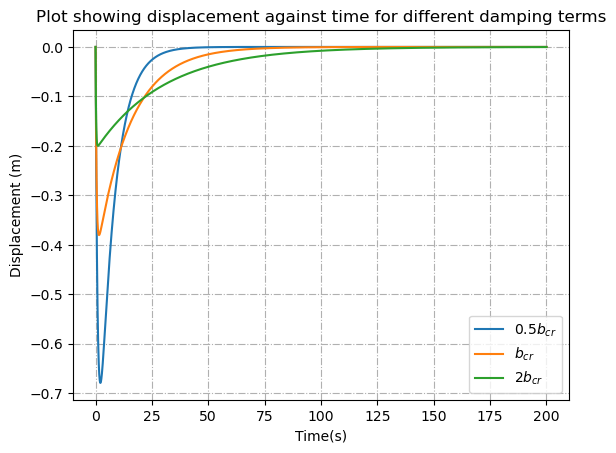

In [13]:
h = 0.001 #Redefining the time step.

# creating a time array and defining the damping values to be used
t_vals = np.arange(0,t_max,h)
b_crit = 4*k*m
b = [0.5*b_crit,b_crit,2*b_crit]
plt.grid(True,linestyle='-.')

# generating the displacements for each damping value
half_crit_position = Verlet_Method(x,v,h,b[0])[0]
crit_position = Verlet_Method(x,v,h,b[1])[0]
double_crit_position = Verlet_Method(x,v,h,b[2])[0]

#plotting the results
plt.plot(t_vals,half_crit_position,label="0.5$b_{cr}$")
plt.plot(t_vals,crit_position,label="$b_{cr}$")
plt.plot(t_vals,double_crit_position,label="2$b_{cr}$")
plt.xlabel("Time(s)")
plt.ylabel("Displacement (m)")
plt.title("Plot showing displacement against time for different damping terms")
plt.legend()
plt.show()



In the graph above, the plot showing the effects of $0.5b_{cr}$ is underdamped as the system oscillates about the equilibrium position. The plot of $b_{cr}$ shows critical damping as the displacement returns to the equilibrium position in the shortest time without oscillating about the equilibrium position. The plot of $2b_{cr}$ shows over damping as the displacement will infinitely get smaller but will never reach the equilibrium position. 

## Forced damped oscillations
By using the Verlet method, we can explore situations of applying a force to the mass-spring system. We will be exploring the case where an instantaneous force is applied after a few cycles so that the acceleration changes briefly from $a = - \frac{k}{m} x - \frac{b}{m} v$ to $a = - \frac{k}{m} x - \frac{b}{m} v + \frac{F}{m}$. Additionally, the mass-spring system will be examined when under a sinuisoidal force that takes the form of $F = F_0sin(\omega t)$. First we will look at the system when acted on by an instantaneous force. 

In [14]:
def Verlet_Method(x,v,h,b,F_mag,start,time):
    """
    Implements the Verlet algorithm and factors in an additional instantaneous force.
    
    Parameters:
        x (float): Initial position
        v (float): Initial velocity
        h (float): time step
    Returns:
        x_vals (numpy array): Position values
    """   
    # Time array
    start_point = int(start/h)
    cycle_number = int(time/h)
    t_vals = np.arange(0, t_max, h)
    N = len(t_vals)
    
    # Arrays to store position values
    x_vals = np.zeros(N)
    v_vals = np.zeros(N)
    
    # First step using Euler method (since Verlet is not self-starting)
    x_vals[1] = x + v*h + 0.5*(-k/m*0) * h**2
    v_vals[0] = v
    # Define constants from the equations
    D = 2*m + b*h
    A = 2*(2 * m-k*h**2)/D
    B = (b*h - 2*m)/D
    
    # Verlet iteration
    for i in range(1, N - 1):
        if start_point < i < start_point + cycle_number:
            x_vals[i+1] = A*x_vals[i] + B*x_vals[i-1] + 2*(h**2)*F_mag/D
            v_vals[i] = (x_vals[i+1]-x_vals[i-1])/(2*h)
        else:
            x_vals[i+1] = A*x_vals[i] + B*x_vals[i-1]
            v_vals[i] = (x_vals[i+1]-x_vals[i-1])/(2*h)
    return np.array([x_vals,v_vals])

Plotting the results for forces of 5N lasting 1 second applied at $t = 0$, $t = 60$ and $t = 120$ in the wave progressions.

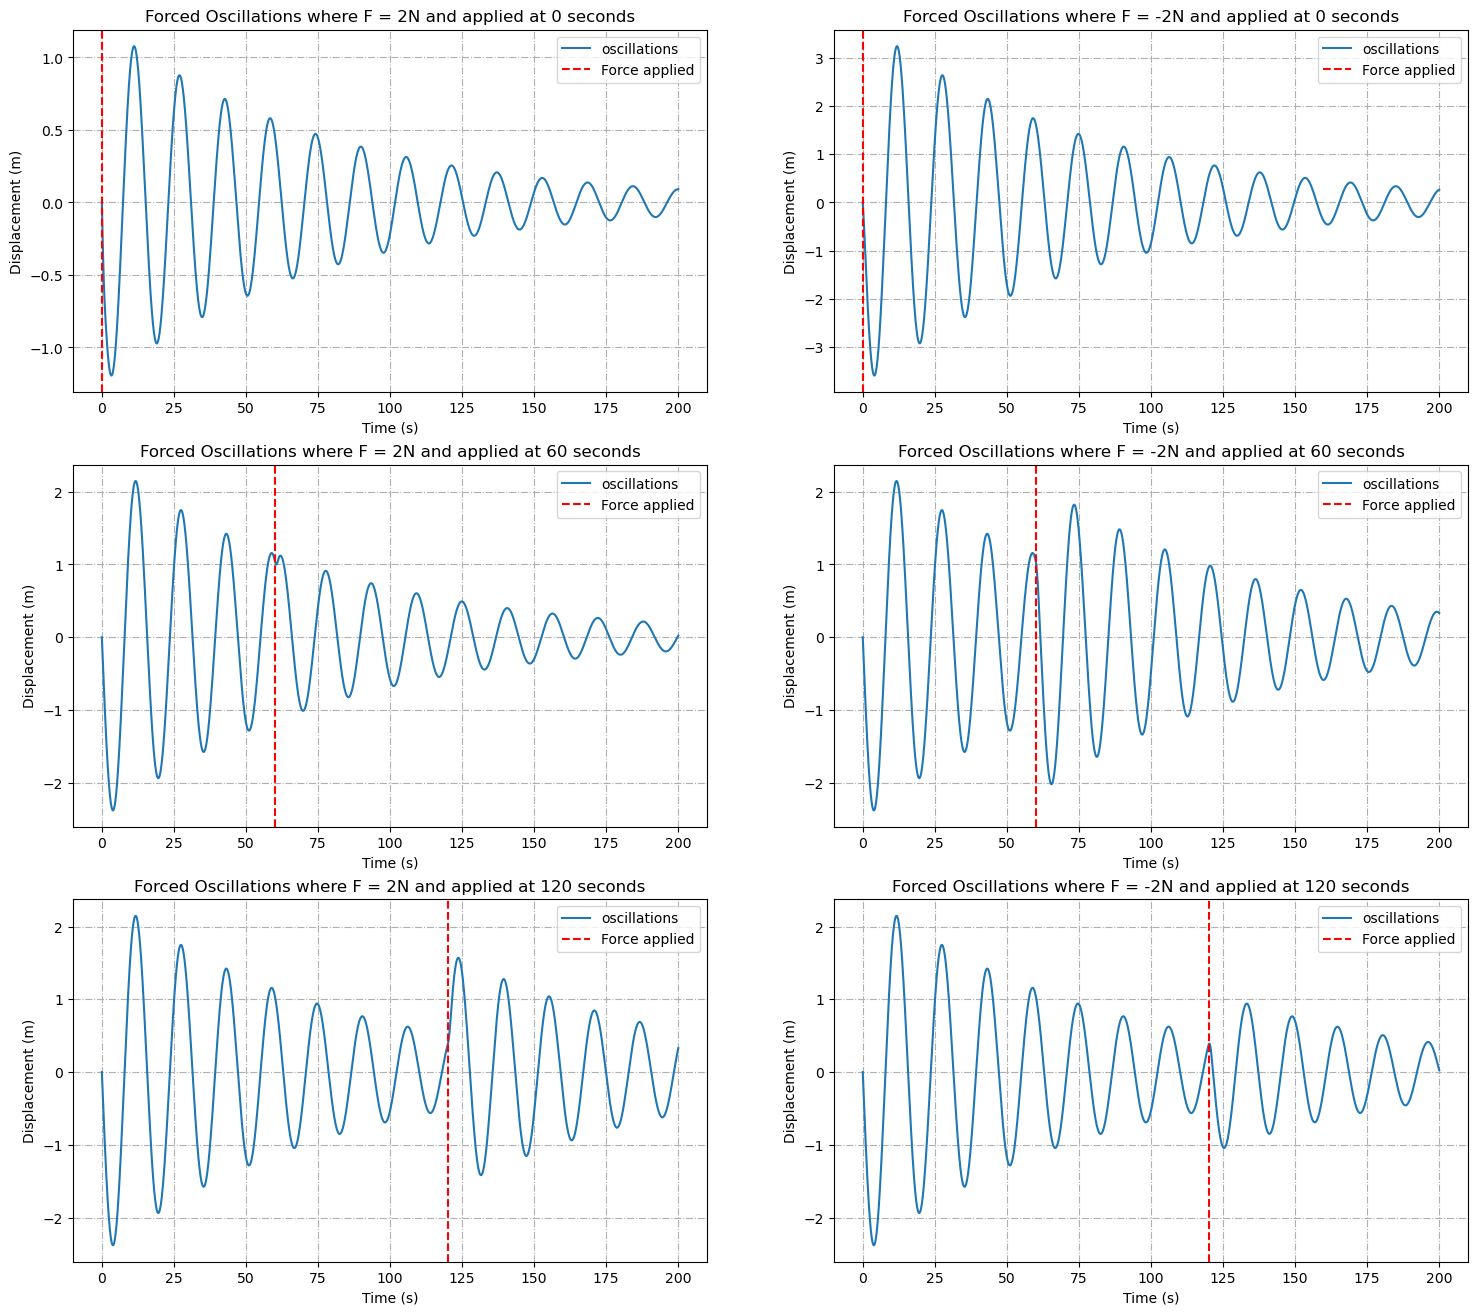

In [15]:
h = 0.001
#creating an array with different instantaneous forces at different times
pos_1 = Verlet_Method(x,v,h,0.1,2,0,1)[0]
pos_2= Verlet_Method(x,v,h,0.1,-2,0,1)[0]
pos_3= Verlet_Method(x,v,h,0.1,2,60,1)[0]
pos_4= Verlet_Method(x,v,h,0.1,-2,60,1)[0]
pos_5= Verlet_Method(x,v,h,0.1,2,120,1)[0]
pos_6 =Verlet_Method(x,v,h,0.1,-2,120,1)[0]

positions=[pos_1,pos_2,pos_3,pos_4,pos_5,pos_6]
forces = [2,-2,2,-2,2,-2]
times = [0,0,60,60,120,120]

# plotting the results
plt.figure(figsize=(18,16))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.grid(True,linestyle = '-.')
    plt.plot(np.arange(0,t_max,h),positions[i],label="oscillations")
    plt.axvline(times[i],color='r',linestyle='--',label="Force applied")
    plt.xlabel("Time (s)")
    plt.ylabel("Displacement (m)")
    plt.title("Forced Oscillations where F = {0}N and applied at {1} seconds".format(forces[i],times[i]))
    plt.legend()
plt.show()

For the mass-spring systems where the instantaneous force is in the negative direction, the amplitude is greater than the systems where the instantaneous force is in the positive direction for all points at where the force is applied. This is because the initial velocity is negative so a force in the negative direction will further increase the amplitude and applying this force at 60 seconds and 120 seconds yields the same results as all 3 points are in phase. Now we shall observe the effects of a sinuisoidal force

In [16]:
def Verlet_Method(x,v,h,b,F_mag,omega,start,time):
    """
    Implements the Verlet algorithm and factors in an additional sinuisoidal force.
    inusoidal
    Parameters:
        x (float): Initial position
        v (float): Initial velocity
        h (float): time step
    Returns:
        x_vals (numpy array): Position values
    """   
    # Time array
    start_point = int(start/h)
    cycle_number = int(time/h)
    t_vals = np.arange(0, t_max, h)
    N = len(t_vals)
        
    # Arrays to store position values
    x_vals = np.zeros(N)
    v_vals = np.zeros(N)
    F_vals = np.zeros(N)
    for i in range(cycle_number):
        F_vals[i+start_point] = F_mag*np.sin(omega*(i+start_point)*h)
    
    # First step using Euler method (since Verlet is not self-starting)
    x_vals[1] = x + v*h + 0.5*(-k/m)*h**2
    v_vals[0] = v
    # Define constants from the equations
    D = 2*m + b*h
    A = 2*(2 * m-k*h**2)/D
    B = (b*h - 2*m)/D
    
    # Verlet iteration
    for i in range(1, N - 1):
            x_vals[i+1] = A*x_vals[i] + B*x_vals[i-1] + 2*(h**2)*F_vals[i]/D
            v_vals[i] = (x_vals[i+1]-x_vals[i-1])/(2*h)
    return np.array([x_vals,v_vals])

Plotting the results for sinuisodal forces that last 50 seconds, have $F_0 = 2N$ with different angular frequencies and started at different points in the oscillation.

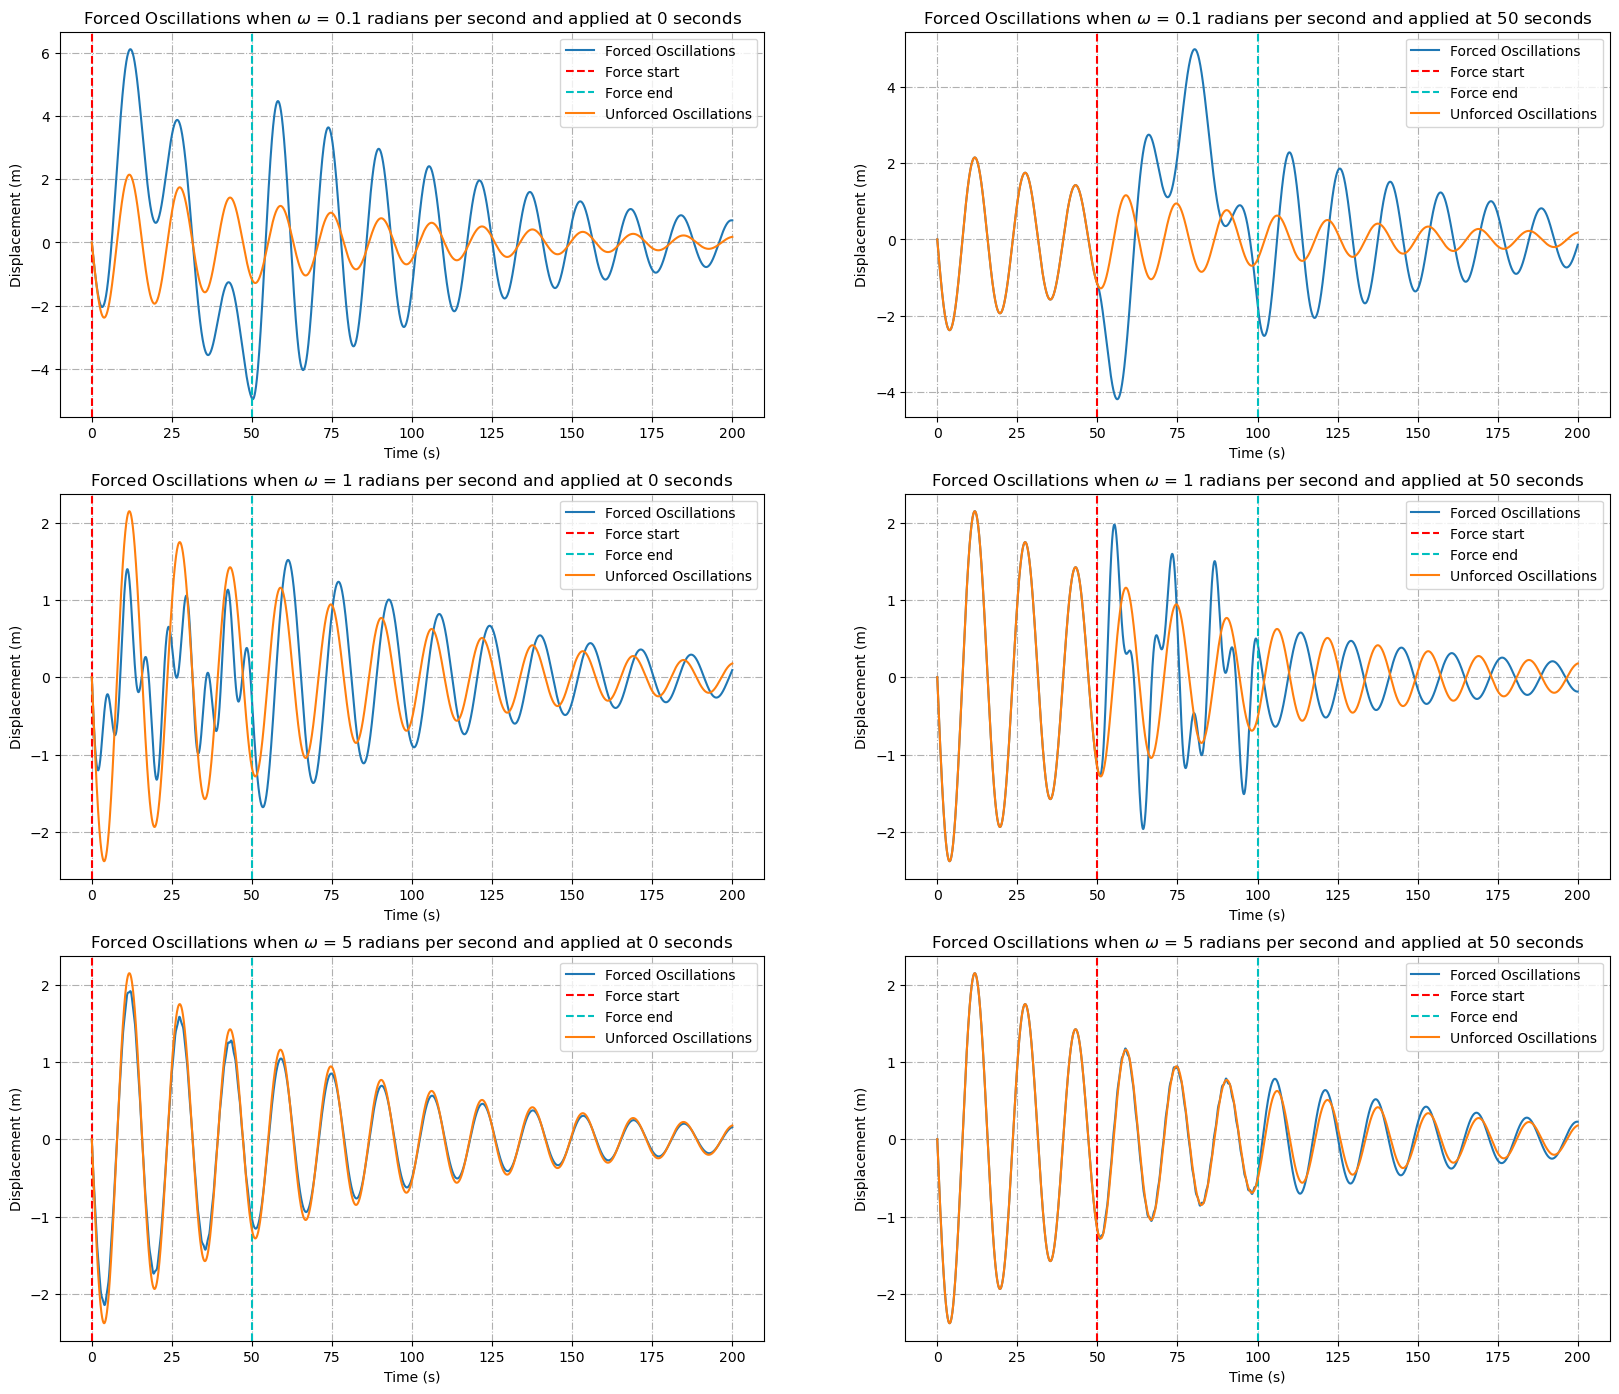

In [17]:
h = 0.001 # defining the time step
Verlet_unforced = Verlet_Method(x,v,h,0.1,0,0.4,0,0)[0] #finding the unforced oscillations to compare with the forced oscillations

# creating an array of forced oscillations with different frequencies and different start times
pos_1 = Verlet_Method(x,v,h,0.1,2,0.1,0,50)[0]
pos_2 = Verlet_Method(x,v,h,0.1,2,0.1,50,50)[0]
pos_3 = Verlet_Method(x,v,h,0.1,2,1,0,50)[0]
pos_4 = Verlet_Method(x,v,h,0.1,2,1,50,50)[0]
pos_5 = Verlet_Method(x,v,h,0.1,2,5,0,50)[0]
pos_6 = Verlet_Method(x,v,h,0.1,2,5,50,50)[0]
Positions = [pos_1,pos_2,pos_3,pos_4,pos_5,pos_6]

line_1 = [0,50,0,50,0,50]
line_2 = [50,100,50,100,50,100]
omegas = [0.1,0.1,1,1,5,5]
        
#plotting the results
plt.figure(figsize=(20,17))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.grid(True,linestyle='-.')
    plt.plot(np.arange(0,t_max,h),Positions[i],label="Forced Oscillations")
    plt.axvline(line_1[i],color='r',linestyle='--',label="Force start")
    plt.axvline(line_2[i],color='c',linestyle='--',label="Force end")
    plt.xlabel("Time (s)")
    plt.ylabel("Displacement (m)")
    plt.title("Forced Oscillations when "+r"$\omega$"+" = {0} radians per second and applied at {1} seconds".format(omegas[i],line_1[i]))
    plt.plot(np.arange(0,t_max,h),Verlet_unforced,label="Unforced Oscillations")
    plt.legend()

plt.show()

    

We notice that for low frequencies of driving force such as $0.1$ $rads^{-1}$ and $1$ $rads^{-1}$, the system experiences a transient response to the sinusoidal force from its steady state. For higher frequencies, such as $5$ $rads^{-1}$, the transient response isn't as pronounced as it is for the previous frequencies. This is because the driving frequency is much further away from the natural frequency of the system which is approximately $0.4$ $rads^{-1}$.

## Resonance
For forced oscillations, the system can experience resonance when the driving frequency of the sinuisoidal force matches the natural frequency of the system. By iterating the Verlet method over a range of angular frequencies, the resonance curve of the system can be plotted to find the frequency. However, taking the maximum value over the entire progression would be incorrect as the amplitude needs taken during a transient period and this needs to be found first.

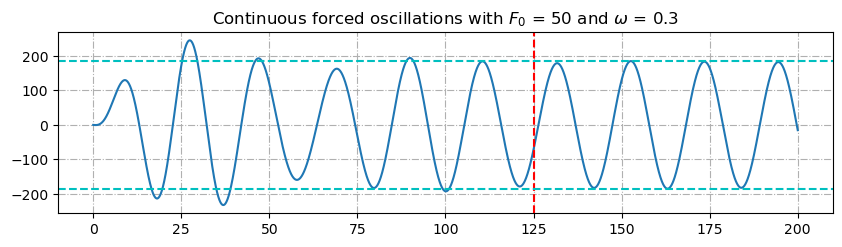

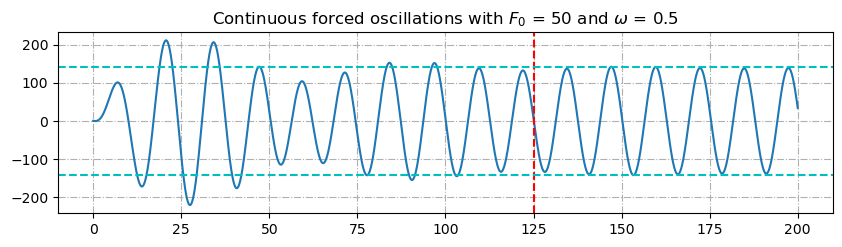

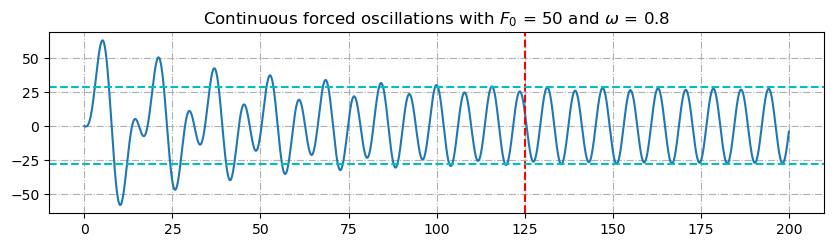

In [18]:
h = 0.005 # time step is larger as the Verlet Method has to iterate many times

# create an array of forced oscillations with different forcing frequencies
pos1 = Verlet_Method(0,-1,h,0.2,50,0.3,0,t_max)[0]
pos2 = Verlet_Method(0,-1,h,0.2,50,0.5,0,t_max)[0]
pos3 = Verlet_Method(0,-1,h,0.2,50,0.8,0,t_max)[0]
positions = [pos1,pos2,pos3]
times = np.arange(0,t_max,h)
dampings = [0.3,0.5,0.8]

# plot the results and show where the transient response has been mitigated
for i in range(3):
    plt.figure(figsize=(10,8))
    plt.subplot(3,1,i+1)
    plt.grid(True,linestyle='-.')
    plt.plot(times,positions[i])
    plt.axvline(125,color='r',linestyle='--')
    plt.axhline(np.max(positions[i][int(125/h):]),color='c',linestyle='--')
    plt.axhline(np.min(positions[i][int(125/h):]),color='c',linestyle='--')
    plt.title(r"Continuous forced oscillations with $F_0$ = 50 and $\omega$ = {0:.1f}".format(dampings[i]))
plt.show()


It can be observed that for the past 125 seconds, the effects of the transient period have been mitigated and the oscillations are stable so the amplitude can be taken as a slice after this point. 

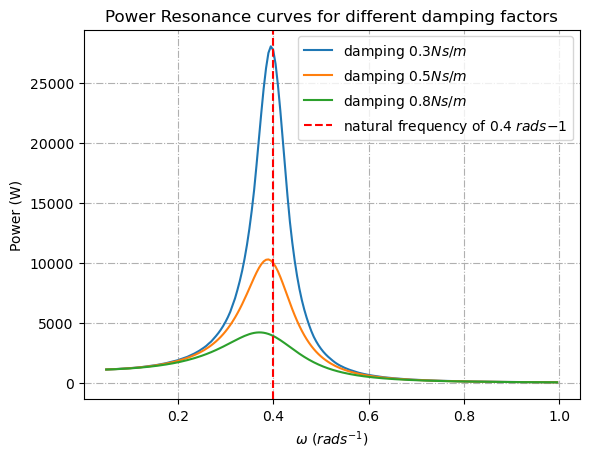

In [19]:
h = 0.005 #Defining a shorter timestep so that a runtime error does not occur

# defining the omega range and damping values for the verlet method to iterate through
omega_range = np.arange(0.05,1,0.005)
dampings = np.array([0.3,0.5,0.8])
power_array = np.array([])
#iteration and plotting of the verlet method across dampings and different frequencies
for j in range(len(dampings)):
    powers = np.array([])
    for i in range(len(omega_range)):
        y = Verlet_Method(0,-1,h,dampings[j],20,omega_range[i],0,t_max)[0]
        amp = np.max(np.abs(y[int(125/h):]))
        powers = np.append(powers,amp**2)
    power_array = np.append(power_array,[powers])
    #plotting the power resonance curve for each damping factor
    plt.grid(True,linestyle='-.')
    plt.plot(omega_range,powers,label="damping {0}$Ns/m$".format(dampings[j]))
plt.axvline(np.sqrt(k/m),color='r',linestyle='--',label="natural frequency of 0.4 $rads{-1}$")
plt.xlabel(r"$\omega$"+" ($rads^{-1}$)")
plt.ylabel("Power (W)")
plt.title("Power Resonance curves for different damping factors")
plt.legend()
plt.show()


The power resonance curves show that the peak is not exactly at the natural frequency of the system. As the damping increases, the peak of each resonance curve decreases and the peak moves further away from the natural frequency.

## Analysing models for the Power resonance curve

We can attempt to model the power resonance curve using the Gaussian model that has the equation : $y = A e^{\frac{(\omega-\mu)^2}{2 \gamma^2}}$, or the Lorentzian model that has the equation : $y = \frac{A}{1+(\frac{\omega-\omega_0}{\gamma/2})^2}$, where $\gamma$ is the damping constant of the system and $\omega_0$ is the natural frequency of the system. We can plot these models against the actual data and recover the damping values used in each model by finding the Full Width at Half Maximum value for the models and compare. In addition we can find the RMSE for the models against the actual data to find which model fits the data better.

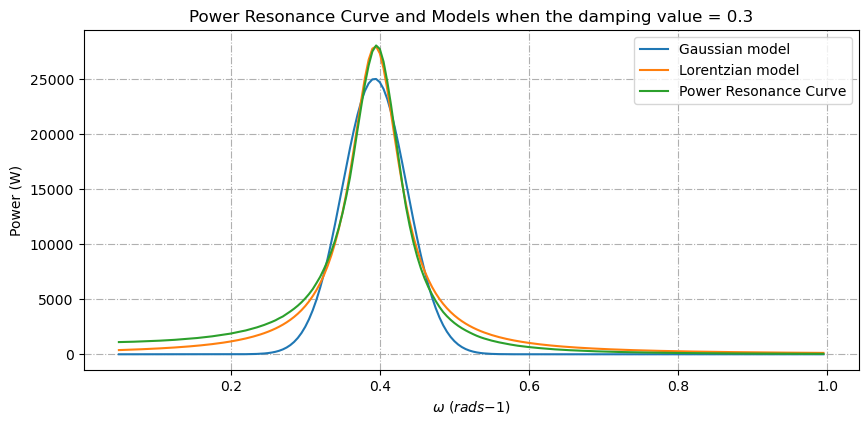

The damping factor is 0.363 for the Gauss.
The damping factor is 0.306 for the Lorentzian.
The RMSE for the Gaussian model is 1.360e+03 and the RMSE for the Lorentzian model is 4.954e+02 against the provided data


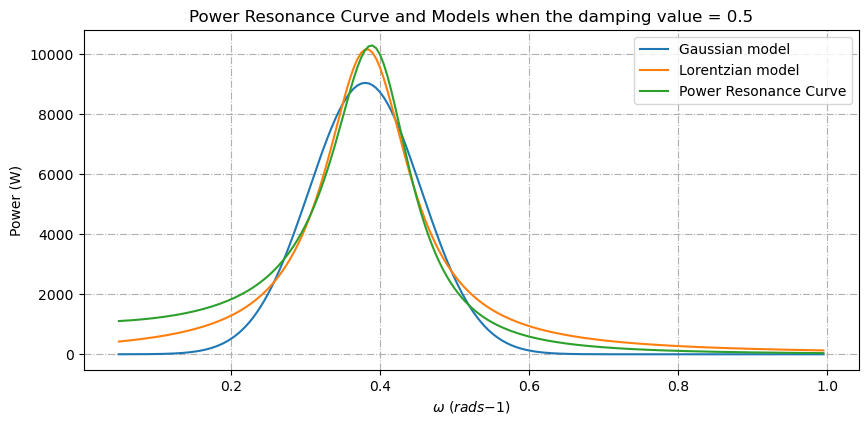

The damping factor is 0.611 for the Gauss.
The damping factor is 0.516 for the Lorentzian.
The RMSE for the Gaussian model is 7.057e+02 and the RMSE for the Lorentzian model is 3.649e+02 against the provided data


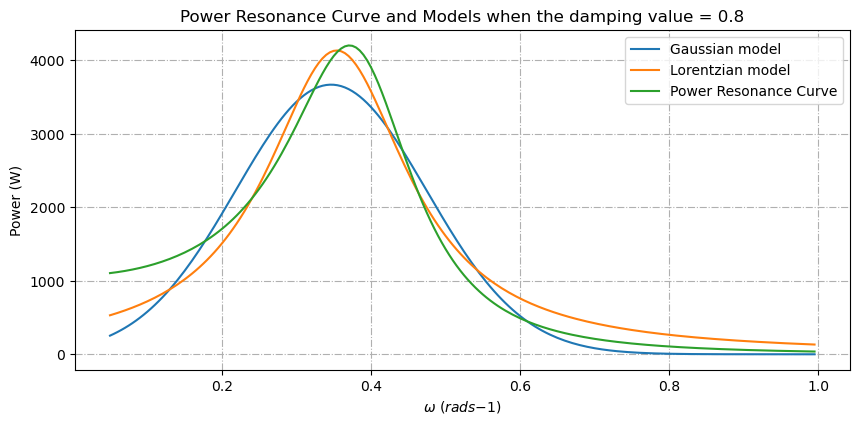

The damping factor is 1.050 for the Gauss.
The damping factor is 0.898 for the Lorentzian.
The RMSE for the Gaussian model is 3.190e+02 and the RMSE for the Lorentzian model is 2.482e+02 against the provided data


In [20]:
h = 0.005 # defining the time step

# defining the omega values and damping values to iterate through
omega_range = np.arange(0.05,1,0.005)
dampings = np.array([0.3,0.5,0.8])

def FWHM(powers,j):

    #defining the max and half height of the power resonance curves
    max_height = np.max(powers)
    half_height = (max_height/2)
    
    # curve fitting the models to the power data provided 
    def Gaussian(x,A,mu,sigma):
        return A * np.exp(-(x-mu)**2/(2*sigma**2))
    
    def Lorentzian(x, A, x0, gamma):
        return A / (1 + ((x - x0) / (gamma / 2))**2)
    
    popt_Gauss, pcov_Gauss = curve_fit(Gaussian,omega_range,powers,p0=[max_height,0.4,dampings[j]*m])
    popt_Lorentz, pcov_Lorentz = curve_fit(Lorentzian,omega_range,powers,p0=[max_height,0.4,dampings[j]*m])
    A_fit, mu_fit, sigma_fit = popt_Gauss
    Amp_fit, x0_fit, gamma_fit = popt_Lorentz

    # plotting the models against the actual data
    plt.figure(figsize = (10,15))
    plt.subplot(len(dampings),1,j+1)
    plt.grid(True,linestyle='-.')
    plt.ylabel("Power (W)")
    plt.xlabel(r"$\omega$ ($rads{-1}$)")
    plt.plot(omega_range,Gaussian(omega_range, *popt_Gauss),label="Gaussian model")
    plt.plot(omega_range,Lorentzian(omega_range, *popt_Lorentz),label="Lorentzian model")
    plt.plot(omega_range,powers,label="Power Resonance Curve")
    plt.title("Power Resonance Curve and Models when the damping value = {}".format(dampings[j]))
    plt.legend()
    plt.show()

    # finding the damping factor using the FWHM for both models
    half_vals = np.array([])
    half_vals_2 = np.array([])
    for i in range(len(omega_range)):
        if math.isclose(Gaussian(omega_range[i],*popt_Gauss),half_height,rel_tol = 5e-2) == True:
            half_vals = np.append(half_vals,omega_range[i])
        if math.isclose(Lorentzian(omega_range[i],*popt_Lorentz),half_height,rel_tol = 5e-2) == True:
            half_vals_2 = np.append(half_vals_2,omega_range[i])
    
    # outputs the values of the damping factors found using the FWHM
    print("The damping factor is {0:.3f} for the Gauss.".format((np.max(half_vals)-np.min(half_vals))*m))
    print("The damping factor is {0:.3f} for the Lorentzian.".format((np.max(half_vals_2)-np.min(half_vals_2))*m))

    # generates and outputs an error for the model against the provided data
    error_Gauss = RMSE(powers,Gaussian(omega_range,*popt_Gauss))
    error_Lorentz = RMSE(powers,Lorentzian(omega_range,*popt_Lorentz))
    print("The RMSE for the Gaussian model is {0:.3e} and the RMSE for the Lorentzian model is {1:.3e} against the provided data".format(error_Gauss,error_Lorentz))

#iterating the code through different damping values to generate power arrays that are fed into the FWHM procedure to analyse them.
for j in range(len(dampings)):
    powers = power_array[j*len(omega_range):(j+1)*len(omega_range)]
    FWHM(powers,j)


In this investigation, we find that the Lorentzian model fits the power resonance curve better than the Gaussian model, as it provides damping values that are closer to the actual value every time, and the RMSE is much smaller for the Lorentzian compared to the Gaussian. However, both models break down as damping increases as the damping values provided stray further from the actual value. The inaccuracy of the models is due to the parameters required for the models being the natural frequency of the system and the damping factor. In reality, a power resonance curve also takes into account the relative phase between the driving frequency and the response frequency.